Coursera Google Advanced Data Analytics

Course 6 The Nuts and Bolts of Machine Learning

Module 4 Tree based modeling

Build and validate a random forest model using a validation data set


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier

# This module lets us save our models once we fit them.
import pickle

In [3]:
# Read in data
file = '/content/Churn_Modelling.csv'
df_original = pd.read_csv(file)
df_original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Drop useless and sensitive (Gender) cols
churn_df = df_original.drop(['RowNumber', 'CustomerId', 'Surname', 'Gender'], axis=1)
churn_df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Dummy encode categoricals
churn_df2 = pd.get_dummies(churn_df, drop_first='True')
churn_df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True


In [6]:
# Define the y (target) variable
y = churn_df2["Exited"]

# Define the X (predictor) variables
X = churn_df2.copy()
X = X.drop("Exited", axis = 1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [19]:
%%time

rf = RandomForestClassifier(random_state=0)

'''
cv_params = {'max_depth': [2,3,4,5, None],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125, 150]
             }
'''

cv_params = {
    'max_depth': [4, 6, None],  # Fewer options
    'min_samples_leaf': [2, 5],  # Fewer options
    'min_samples_split': [2, 4],  # Fewer options
    'max_features': [2, 4],  # Fewer options
    'n_estimators': [100, 150]  # Fewer options
}

# Define scoring as a dictionary for multiple metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# GridSearchCV with corrected scoring parameter
rf_cv = GridSearchCV(
    estimator=rf,
    param_grid=cv_params,
    scoring=scoring,
    cv=5,
    refit='f1'  # Refits the model based on the F1 score
)

# Line below is commented out because it was already run
# Results saved in `rf_cv_model.pickle` below
rf_cv.fit(X_train, y_train)

CPU times: user 3min 29s, sys: 804 ms, total: 3min 30s
Wall time: 3min 31s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, None], 'max_features': [2, 4],
                         'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 150]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [20]:
# Define a path to the folder where you want to save the model
path = '/content/'

In [21]:
# Cell has already been run and saved
# Uncomment if refitting model above, along with fitting the data above

# Pickle the model
with open(path+'rf_cv_model.pickle', 'wb') as to_write:
    pickle.dump(rf_cv, to_write)

In [22]:
# Read in pickled model
with open(path + 'rf_cv_model.pickle', 'rb') as to_read:
    rf_cv = pickle.load(to_read)

In [23]:
# Model has been fit already so line below is commented out
#rf_cv.fit(X_train, y_train)

rf_cv.best_params_

{'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 150}

In [24]:
rf_cv.best_score_

0.579048008085795

In [25]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

In [31]:
# Make a results table for the rf_cv model using above function
rf_cv_results = make_results('Random Forest CV', rf_cv)
rf_cv_results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest CV,0.579048,0.47121,0.754839,0.860933


In [29]:
# Read in master results table
results = pd.read_csv('/content/Results1.csv', index_col=0)
results

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.560655,0.469255,0.701608,0.8504


In [32]:
# Concatenate the random forest results to the master table
results = pd.concat([rf_cv_results, results])
results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest CV,0.579048,0.471210,0.754839,0.860933
0,Tuned Decision Tree,0.560655,0.469255,0.701608,0.850400


In [34]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate).
    Returns a plot of confusion matrix for predictions on y data.
    '''

    # Make predictions on (x) test data
    model_pred = model.predict(x_data)

    # Compute values for confusion matrix
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)

    # Create display of confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)

    # Plot confusion matrix
    disp.plot(values_format='')  # `values_format=''` suppresses scientific notation

    # Display plot
    plt.show()

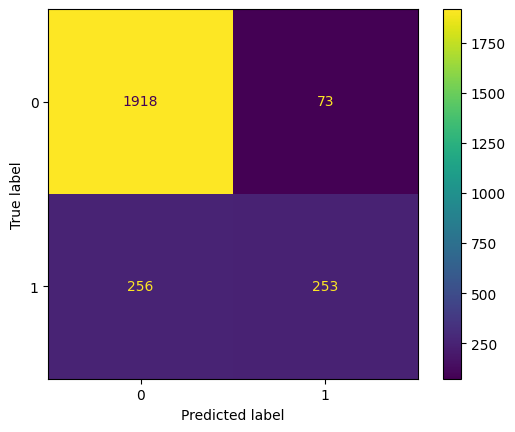

In [35]:
# Generate confusion matrix

conf_matrix_plot(rf_cv.best_estimator_, X_test, y_test)

In [36]:
def forest_importances_plot(model, x_data):
    '''
    Accepts as argument model object, X data (test or validate).
    Returns a plot of forest_importances.
    '''

    importances = model.feature_importances_

    forest_importances = pd.Series(importances, index=x_data.columns).sort_values(ascending=False)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(ax=ax);

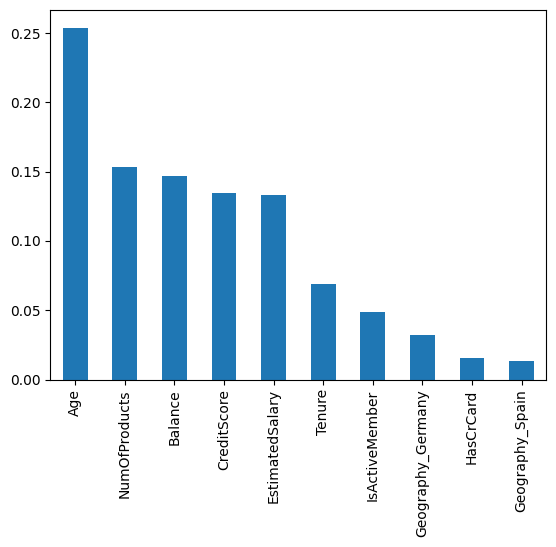

In [37]:
# Plot and display `feature_importances_` attribute relative to each feature

forest_importances_plot(rf_cv.best_estimator_, X)

In [38]:
# Create separate validation data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2,
                                            stratify=y_train, random_state=10)

In [39]:
# Create list of split indices
split_index = [0 if x in X_val.index else -1 for x in X_train.index]

In [40]:
from sklearn.model_selection import PredefinedSplit

In [45]:
rf = RandomForestClassifier(random_state=0)

'''
cv_params = {'max_depth': [2,3,4,5, None],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125, 150]
             }
'''

cv_params = {
    'max_depth': [4, 6, None],  # Fewer options
    'min_samples_leaf': [2, 5],  # Fewer options
    'min_samples_split': [2, 4],  # Fewer options
    'max_features': [2, 4],  # Fewer options
    'n_estimators': [100, 150]  # Fewer options
}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

custom_split = PredefinedSplit(split_index)

rf_val = GridSearchCV(rf, cv_params, scoring=scoring, cv=custom_split, refit='f1')

In [46]:
%%time

rf_val.fit(X_train, y_train)

CPU times: user 44.1 s, sys: 129 ms, total: 44.2 s
Wall time: 44.4 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1,  0, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, None], 'max_features': [2, 4],
                         'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 150]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [47]:
# Cell has already been run and saved
# Uncomment if refitting model above, along with fitting the data above

# Pickle the model
with open(path+'rf_val_model.pickle', 'wb') as to_write:
   pickle.dump(rf_val, to_write)

In [48]:
# Open pickled model
with open(path+'rf_val_model.pickle', 'rb') as to_read:
    rf_val = pickle.load(to_read)

In [57]:
rf_val.best_params_

{'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [58]:
rf_val.best_score_

0.5720164609053497

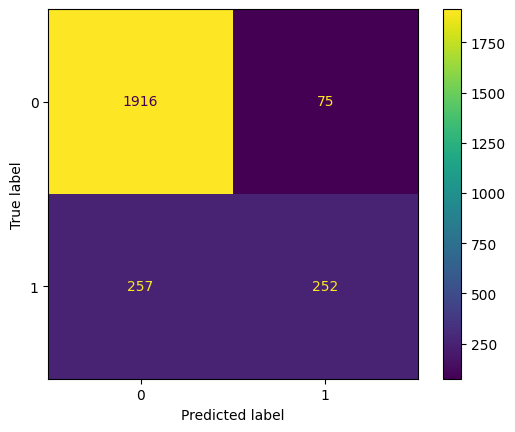

In [59]:
# Generate confusion matrix

conf_matrix_plot(rf_val.best_estimator_, X_test, y_test)

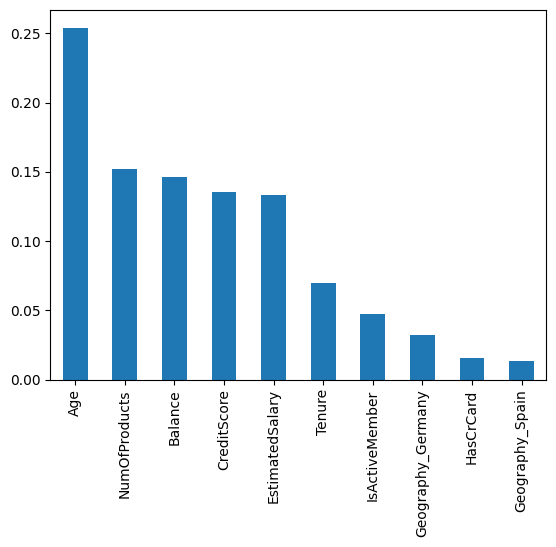

In [60]:
# Plot and display `feature_importances_` attribute relative to each feature

forest_importances_plot(rf_val.best_estimator_, X)

In [67]:
# Create model results table
rf_val_results = make_results('Random Forest Validated', rf_val)

# Concatentate model results table with master results table
results = pd.concat([rf_val_results, results])

# Remove duplicate rows
results = results.drop_duplicates()

# Sort master results by F1 score in descending order
results.sort_values(by=['F1'], ascending=False)

,Model,F1,Recall,Precision,Accuracy
0,Random Forest CV,0.579048,0.471210,0.754839,0.860933
0,Random Forest Validated,0.572016,0.454248,0.772222,0.861333
0,Tuned Decision Tree,0.560655,0.469255,0.701608,0.850400


In [68]:
# Save the master results table
results.to_csv(path+'results2.csv', index=False);